In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chisquare
from pcg import PCG

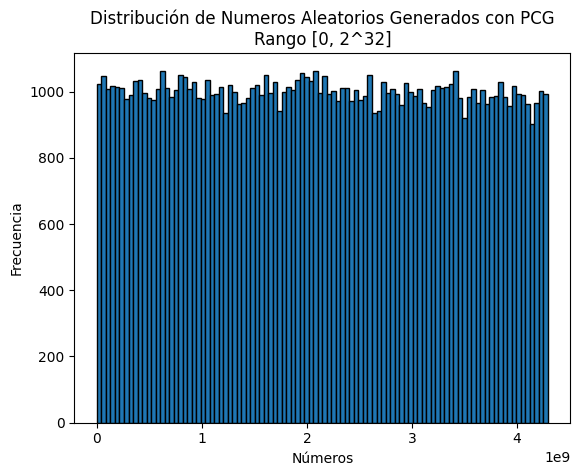

In [56]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 2^32]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_histogram()

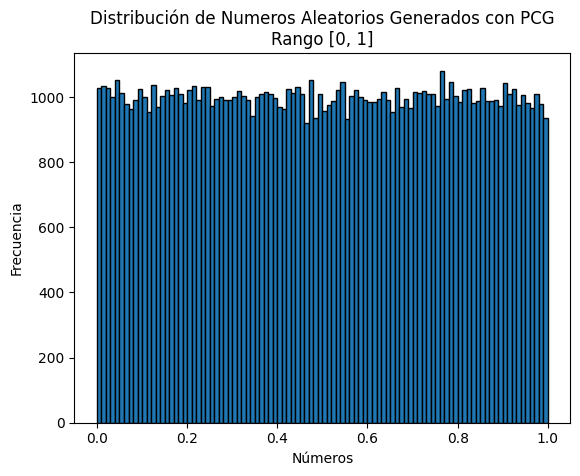

In [57]:
"""
    Histograma:
    
    Se busca comprobar que la frecuencia obtenida por cada número en el eje x sea similar
    de esta forma la probabilidad de obtener cualquier número seguiría una distribución uniforme.
"""
def create_normalized_histogram():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]

    plt.hist(numbers, bins=100, edgecolor="black")
    plt.title("Distribución de Numeros Aleatorios Generados con PCG\nRango [0, 1]")
    plt.xlabel("Números")
    plt.ylabel("Frecuencia")
    plt.plot()

create_normalized_histogram()

In [68]:
"""
    Test estadístico 01 para comprobar que el algoritmo sigue una distribución uniforme
    h0: La distribución de la muestra sigue una distribucion uniforme
    h1: La distribución de la muestra no sigue una distribucion uniforme

    - Si rechazamos la hipotesis nula diremos que encontramos suficiente evidencia para
      decir que la misma es falsa con una probabilidad alfa (significancia) de equivocarnos.
    - Si no rechazamos la hipótesis nula diremos que no encontramos suficiente evidencia
      en las muestras para rechazarla y no se puede concluir que la distribución no sea 
      uniforme con ese nivel de significancia.
"""
def chisquare_test():
    seed = int(time.time() * 1_000)
    pcga = PCG(seed)
    numbers = [pcga.random_normalized() for _ in range(100_000)]
    
    num_bins = 100
    min_val = 0
    max_val = 1
    bin_edges = num_bins + 1
    significance = 0.05
    bins = np.linspace(min_val, max_val, bin_edges)
    counts, _ = np.histogram(numbers, bins=bins)
    expected_counts = [len(numbers) / num_bins] * num_bins
    
    dsquare, p_value = chisquare(counts, f_exp=expected_counts)
    p_value = round(p_value, 2)
    dsquare = round(dsquare, 2)
    
    print(f"P valor: {p_value:.2f}")
    print(f"D cuadrado: {dsquare:.2f}")
    print()
    
    if p_value >= significance:
        print("[*] No hay suficiente evidencia para rechazar la hipótesis nula")
        print(f"[*] P valor = {p_value:.2f} > alfa = {significance:.2f}")
    else:
        print("[*] Se rechaza la hipotesis nula")
        print(f"[*] P valor = {p_value:.2f} < alfa = {significance:.2f}")

chisquare_test()

P valor: 0.56
D cuadrado: 96.18

[*] No hay suficiente evidencia para rechazar la hipótesis nula
[*] P valor = 0.56 > alfa = 0.05
